# Word2Vec

Word2Vec is a technique for NLP published in 2013.
The word2vec algo uses a neural network model to learn word associations from a large corpus of text.
Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence.
As the name implies, word2vec represents each distinct word with a paticular list/array of numbers called a vector.

In [ ]:
"""
In this the vector of a word is made using some features relation with that word .
Below is the example of how the vectors are made of each word:

WORDS ---> |            | Boy    | Girl       | King       | Queen     |  Apple
------------------------|--------|------------|------------|-----------|-----------------
           |  gender    |  -1    |   1        |  -0.92     |  0.96     |   0.01   
     |     |  royal     |  0.01  |   0.03     |   0.98     |  0.99     |   -0.05
Features   |  age       |  0.03  |   0.09     |   0.87     |  0.86     |   0.01
     |     |  food      |  0.001 |  0.001     |  0.007     |  0.005    |   0.98
     |     |  .         |   .    |     .      |     .      |     .     |     .
     |     |  .         |   .    |     .      |     .      |     .     |     .
     |     |  .         |   .    |     .      |     .      |     .     |     .
     |     | nth feature|  0.01  |   0.02     |   0.03     |  0.04     |   0.05




Through this we can see that the vector of each word is made using some features.
like we get the vector of boy as:

[ -1, 0.01, 0.03, 0.001, ..., 0.01]

-1 means that the word boy related to the featuer gender is negative, 
0.01 means that the word boy related to the feature royal is positive and is very less related to it, 
0.03 means that the word boy related to the feature age is positive and is very less related to it,

"""

'\nIn this the vector of a word is made using some features.\nBelow is the example of how the vectors are made of each word:\n\nWORDS --->              Boy     Girl        King        Queen       Apple\n     ^       gender      -1       1          -0.92       0.96        0.01   \n     |       royal       0.01     0.03        0.98       0.99        -0.05\nFeatures     age         0.03     0.09        0.87       0.86        0.01\n     |       food        0.001   0.001       0.007       0.005       0.98\n     |       .            .         .           .           .          .\n     |       .            .         .           .           .          .\n     |       .            .         .           .           .          .\n     |      300th dim    \n\n'

In [1]:
"""
For finding the simialrity between two words we can use the cosine similarity formula:
distance = 1 - consine_similarity(vector1, vector2)

and the cosine similarity formula is given by:
cosine_similarity(a, b) = (a . b) / (||a|| * ||b||)

where:

"""


'\nFor finding the simialrity between two words we can use the cosine similarity formula:\ndistance = 1 - consine_similarity(vector1, vector2)\n\nand the cosine similarity formula is given by:\ncosine_similarity(a, b) = (a . b) / (||a|| * ||b||)\n\nwhere:\n\n'

#### We can tarin our own model or use any pre-trained model.

## Word2Vec is of two types: 


In [2]:
"""
1) CBOW (Continuous Bag of Words)
2) skipgram (Skip-gram)

"""

'\n1) CBOW (Continuous Bag of Words)\n2) skipgram (Skip-gram)\n\n'

### Working


In [1]:

"""
CBOW 

Example sentence = "How are you i hope your life is good"

Steps:
1) we select a window size lets say 5
2) now we select the 1st 5 words of a sentence then we select the middle word as Output and rest will be input
    so for above ex , it wil be like  INPUT(How, are, i, hope) and OUTPUT(you)
3) now we will select 2nd 5 words and we will get INPUT(are, you, hope, your)  and OUTPUT(i)
4) The final data will be,
          INPUT                OUPUT
    how, are, i, hope           you
    are, you, hope, your         i
    you, i, your, life          hope
    i, hope, life, is           your
    hope, your, is good         life

5) Make the OHE for the above input data,  so for "how" it can be (1,0,0,0,0,0,0,0,0) for "are" (0,1,0,0,0,0,0,0,0) 
6) now we will train a neural network on the above data
7) the structure of the NN is 
    input layer :  it will be the OHE of each word of a row
    middle layer/ hidden layer:     the no of neurons will be same as the size of the window (so here it is 5)
    ouput layer:        the no of neurons will we the size of vocabulary (unique words)

through this we will get the vector of a word , ex : for 1st row   we will get the vector of "you" as [0.23,0.81,0.99,0.69,0.88]  as these values are the relation of "you" word with the "how","are","you","i","hope"

we can say that these values are the features used to make the vector of a word.

in above word2vec section , i have made a table of words and 300 features ,  similarly we can change the window size to 300 and through this we will get the vectors(with 300 features relation) of each word  i.e. relation of a word with 300 other words   represented in a number and stored in a vector

"""

'\nCBOW \n\nExample sentence = "How are you i hope your life is good"\n\nSteps:\n1) we select a window size lets say 5\n2) now we select the 1st 5 words of a sentence then we select the middle word as Output and rest will be input\n    so for above ex , it wil be like  INPUT(How, are, i, hope) and OUTPUT(you)\n3) now we will select 2nd 5 words and we will get INPUT(are, you, hope, your)  and OUTPUT(i)\n4) The final data will be,\n          INPUT                OUPUT\n    how, are, i, hope           you\n    are, you, hope, your         i\n    you, i, your, life          hope\n    i, hope, life, is           your\n    hope, your, is good         life\n\n5) Make the OHE for the above input data,  so for "how" it can be (1,0,0,0,0,0,0,0,0) for "are" (0,1,0,0,0,0,0,0,0) \n6) now we will train a neural network on the above data\n7) the structure of the NN is \n    input layer :  it will be the OHE of each word of a row\n    middle layer/ hidden layer:     the no of neurons will be same as t

In [2]:
"""
Skipgram

In skipgram we do the opposite of CBOW, i.e. we take a word and find the context words around it.
Here output becomes input and input becomes output.

Here is how it works:
1) We take the same example sentence: "How are you i hope your life is good"
2) We select a window size, let's say 5.
3) Now we take the first word "How" and find the context words around it.
4) The context words for "How" will be the words within the window size of 5, which are "are", "you", "i", "hope".
5) So for the word "How", we will have INPUT("How") and OUTPUT("are", "you", "i", "hope").
6) Now we will repeat this for all the words in the sentence.
7) The final data will be:
          INPUT                OUTPUT
           How             are, you, i, hope

And we again train the NN to get the vector of each word.


"""

'\nSkipgram\n\nIn skipgram we do the opposite of CBOW, i.e. we take a word and find the context words around it.\nHere output becomes input and input becomes output.\n\nHere is how it works:\n1) We take the same example sentence: "How are you i hope your life is good"\n2) We select a window size, let\'s say 5.\n3) Now we take the first word "How" and find the context words around it.\n4) The context words for "How" will be the words within the window size of 5, which are "are", "you", "i", "hope".\n5) So for the word "How", we will have INPUT("How") and OUTPUT("are", "you", "i", "hope").\n6) Now we will repeat this for all the words in the sentence.\n7) The final data will be:\n          INPUT                OUTPUT\n           How             are, you, i, hope\n\nAnd we again train the NN to get the vector of each word.\n\n\n'

In [2]:
"""
When to use skipgram and CBOW:

When data is small we use CBOW as it is faster and gives good results.
When data is large we use skipgram as it captures more context and gives better results.

"""

'\nWhen to use skipgram and CBOW:\n\nWhen data is small we use CBOW as it is faster and gives good results.\nWhen data is large we use skipgram as it captures more context and gives better results.\n\n'

## Trying to Implement the CBOW model using TensorFlow

In [ ]:
""" For code and understanding:  https://chatgpt.com/share/686a0c62-e3b0-8010-beb8-0e60925aaa43 """


In [1]:
import tensorflow as tf
import numpy as np


In [32]:
corpus = "the quick brown fox jumps over the lazy dog"
words = corpus.lower().split()

# Create a vocabulary and a mapping from words to indices
vocab = list(set(words))
wordToIndex = { word : i for i,word in enumerate(vocab)}
indexToWord = { i: word for word, i in wordToIndex.items()}

vocab_size = len(vocab)
print(f"Vocabulary Size: {vocab_size}")

# Create training data
def generate_training_data(words, window_size=2):
    training_data = []
    for i in range(window_size, len(words) - window_size):
        context = [words[j] for j in range(i - window_size, i + window_size +1) if j!= i]
        print(context)
        target = words[i]
        print(target)
        training_data.append((context, target))
    
    # Convert words to indices
    X = []
    y = []
    for context, target in training_data:
        context_idx = [wordToIndex[word] for word in context]
        target_idx = wordToIndex[target]
        X.append(context_idx)
        print(X)
        y.append(target_idx)

    X = tf.constant(X, dtype=tf.int32)
    y = tf.constant(y, dtype=tf.int32)
    return training_data, X, y

data, X,y = generate_training_data(words)
X

Vocabulary Size: 8
['the', 'quick', 'fox', 'jumps']
brown
['quick', 'brown', 'jumps', 'over']
fox
['brown', 'fox', 'over', 'the']
jumps
['fox', 'jumps', 'the', 'lazy']
over
['jumps', 'over', 'lazy', 'dog']
the
[[5, 0, 2, 6]]
[[5, 0, 2, 6], [0, 4, 6, 1]]
[[5, 0, 2, 6], [0, 4, 6, 1], [4, 2, 1, 5]]
[[5, 0, 2, 6], [0, 4, 6, 1], [4, 2, 1, 5], [2, 6, 5, 3]]
[[5, 0, 2, 6], [0, 4, 6, 1], [4, 2, 1, 5], [2, 6, 5, 3], [6, 1, 3, 7]]


<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[5, 0, 2, 6],
       [0, 4, 6, 1],
       [4, 2, 1, 5],
       [2, 6, 5, 3],
       [6, 1, 3, 7]], dtype=int32)>

In [ ]:
# tf.constant(value = [[1,2,3],[4,5,6]],shape= (2,3), dtype = tf.int32)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [34]:
class CBOW(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim=4):
        super().__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)      #Learns a trainable lookup table: vocab_size × embedding_dim  ,  When you input word indices, it returns their embeddings 📌 Why used? , This layer replaces the need for manual W1. It's efficient and automatically trainable.
        self.dense = tf.keras.layers.Dense(vocab_size) # Ouput layer with vocab_size neurons, each neuron corresponds to a word in the vocabulary

    def call(self, X):
        x = self.embedding(X)  # Get the embeddings for the input indices
        x = tf.reduce_mean(x, axis=1) # Average the embeddings across the context words
        return self.dense(x) # Pass the averaged embeddings through the dense layer to get the output logits
    
model = CBOW(vocab_size, embedding_dim=vocab_size)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)  
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)



In [35]:
# Train the model
for epoch in range(5000):
    with tf.GradientTape() as tape:
        logits = model(X)           # Get the model's predictions , logits means y_pred
        loss_value = loss(y, logits)

    grad = tape.gradient(loss_value, model.trainable_variables)  # Calculate gradients
    # print(f"Gradients at epoch {epoch}: {grad}")
    optimizer.apply_gradients(zip(grad, model.trainable_variables))  # Update the model's weights

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss_value.numpy()}")
        print("Word Vectors:")
        print({indexToWord[2]: model.embedding(tf.constant([[2]])).numpy().flatten()  })
    

Epoch 0, Loss: 2.075009822845459
Word Vectors:
{'fox': array([ 0.03222447, -0.04326393,  0.02294371,  0.02602548,  0.00206489,
       -0.0564393 ,  0.04524743,  0.06354804], dtype=float32)}
Epoch 1000, Loss: 0.0007812738185748458
Word Vectors:
{'fox': array([-0.94635016,  0.39535388, -0.27680957, -0.75982374,  0.66449994,
       -1.6032864 ,  1.7012354 ,  1.7893486 ], dtype=float32)}
Epoch 2000, Loss: 0.00018859372357837856
Word Vectors:
{'fox': array([-1.0421518 ,  0.47318816, -0.31664485, -0.7978167 ,  0.706786  ,
       -1.7090677 ,  1.8120755 ,  1.8891705 ], dtype=float32)}
Epoch 3000, Loss: 7.416906009893864e-05
Word Vectors:
{'fox': array([-1.1020143 ,  0.5237442 , -0.34160733, -0.8173533 ,  0.7337272 ,
       -1.7739831 ,  1.8828686 ,  1.9467384 ], dtype=float32)}
Epoch 4000, Loss: 3.499919330351986e-05
Word Vectors:
{'fox': array([-1.1487294 ,  0.5641988 , -0.36109358, -0.8305258 ,  0.75493115,
       -1.824105  ,  1.9387019 ,  1.9893322 ], dtype=float32)}


### Checking similarity between words


In [44]:
import numpy as np

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Example: compute cosine similarity between all pairs of word vectors
for i in range(vocab_size):
    vec_i = model.embedding(tf.constant([[i]])).numpy().flatten()
    vec_j = model.embedding(tf.constant([[2]])).numpy().flatten()
    print(f"word {indexToWord[i]} :")
    sim = cosine_similarity(vec_i,vec_j )
    print(f"  similarity to {indexToWord[0]}: {sim:.4f}")

word quick :
  similarity to quick: 0.1138
word over :
  similarity to quick: -0.4964
word fox :
  similarity to quick: 1.0000
word lazy :
  similarity to quick: -0.0725
word brown :
  similarity to quick: -0.1446
word the :
  similarity to quick: 0.9997
word jumps :
  similarity to quick: -0.2343
word dog :
  similarity to quick: -0.4482


In [52]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 495.5 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 495.5 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 248.8 kB/s eta 0:00:00
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.7 MB ? eta -:--:--
   ----------------------------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


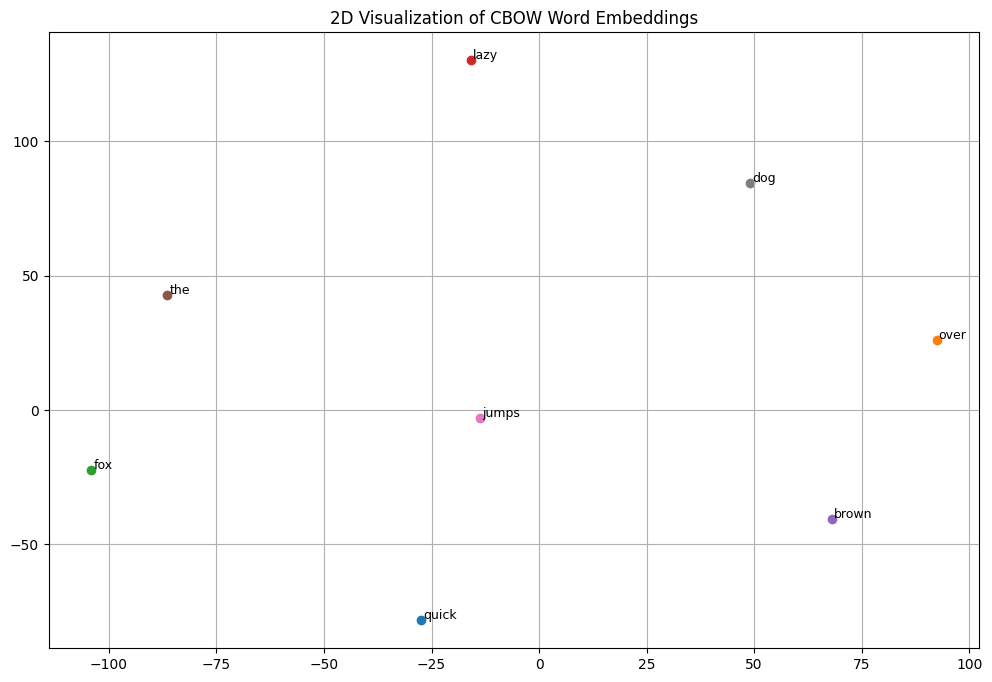

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# === Get the learned word embeddings ===
embedding_matrix = model.embedding.get_weights()[0]  # shape: [vocab_size, embedding_dim]

# === Select subset of words to visualize ===
num_words_to_plot = min(100, vocab_size)
embeddings_subset = embedding_matrix[:num_words_to_plot]
words_subset = [indexToWord[i] for i in range(num_words_to_plot)]

# === Reduce to 2D using t-SNE ===
tsne = TSNE(n_components=2, perplexity=6, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings_subset)

# === Plotting the word vectors ===
plt.figure(figsize=(12, 8))
for i, word in enumerate(words_subset):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, (x + 0.5, y + 0.5), fontsize=9)

plt.title("2D Visualization of CBOW Word Embeddings")
plt.grid(True)
plt.show()


In [59]:
# import torch
# print(torch.cuda.is_available())   # True if GPU is ready


In [60]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


## Advantages of Word2Vec

1) sparse matrix to Dense martix 
2) Sementic info is getting captured
3) Vocaulary size is huge as 
Corpus: Google News dataset
Corpus size: ~100 billion words
Vocabulary size: ~3 million unique words and phrases
Vector size: 300 dimensions
Model type: Skip-gram with negative sampling
File size: ~1.5 GB (binary format)

4) OOV problem is also solved as mostly all the words are covered

## Practical of Word2Vec

In [72]:
pip uninstall gensim numpy -y


Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [73]:
pip install numpy==1.24.3


   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 1.9 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/14.8 MB 2.5 MB/s eta 0:00:06
   ----- ---------------------------------- 2.1/14.8 MB 2.8 MB/s eta 0:00:05
   ------- -------------------------------- 2.9/14.8 MB 3.0 MB/s eta 0:00:04
   -------- ------------------------------- 3.1/14.8 MB 3.1 MB/s eta 0:00:04
   --------- ------------------------------ 3.4/14.8 MB 2.8 MB/s eta 0:00:05
   --------- ------------------------------ 3.4/14.8 MB 2.8 MB/s eta 0:00:05
   ---------- ----------------------------- 3.9/14.8 MB 2.2 MB/s eta 0:00:06
   ---------- ----------------------------- 3.9/14.8 MB 2.2 MB/s eta 0:00:06
   ---------- ----------------------------- 3.9/14.8 MB 2.2 MB/s eta 0:00:06
   ---------- ----------------------------- 3.9/14.8 MB 2.2 MB/s eta 0:00:06
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


In [74]:
pip install gensim==4.3.3


  Using cached gensim-4.3.3-cp311-cp311-win_amd64.whl.metadata (8.2 kB)
Using cached gensim-4.3.3-cp311-cp311-win_amd64.whl (24.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gensim

In [2]:
from gensim.models import Word2Vec , KeyedVectors

In [3]:
import gensim.downloader as api
# Download the pre-trained Word2Vec model
W2V = api.load("word2vec-google-news-300")



[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
vec_king = W2V["king"]
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [5]:
vec_king.shape  # Shape should be (300,) as it has 300 features relation with other words

(300,)

In [6]:
W2V.most_similar("Apple")

[('Apple_AAPL', 0.7456986308097839),
 ('Apple_Nasdaq_AAPL', 0.7300410270690918),
 ('Apple_NASDAQ_AAPL', 0.717508852481842),
 ('Apple_Computer', 0.7145972847938538),
 ('iPhone', 0.6924266219139099),
 ('Apple_NSDQ_AAPL', 0.6868603229522705),
 ('Steve_Jobs', 0.6758421659469604),
 ('iPad', 0.6580768823623657),
 ('Apple_nasdaq_AAPL', 0.6444970369338989),
 ('AAPL_PriceWatch_Alert', 0.6439753174781799)]

In [7]:
W2V.similarity("fox", "dog")  # Similarity between two words

0.5275388

In [8]:
vec = W2V["king"]-W2V["queen"]+W2V["Boy"]
W2V.most_similar([vec])

[('Boy', 0.7899259924888611),
 ('Man', 0.5032512545585632),
 ('Boy_Incorporated_LZB', 0.4937407374382019),
 ('Boy_recliners', 0.4668518900871277),
 ('Uncle', 0.45959025621414185),
 ('Lopez_Lomong_Lost', 0.45673850178718567),
 ('Daddy', 0.4554762542247772),
 ('Brother', 0.449018657207489),
 ('Boy_recliner', 0.4386923313140869),
 ('Dad', 0.4357953369617462)]